In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./local_rewards_costs.xls')
data_wo_nans = data.dropna()
data_wo_nans.head()

,Time stamp,Actual reward,Expected reward,Actual cost: dist,Actual cost: turn,Actual cost: trav,Expected cost: dist,Expected cost: turn,Expected cost: trav,Actual path length,Expected path length
0,103.020,1966.381226,2234.773438,5.217618,5.588763,0.004026,4.352918,29.179485,0.003667,5.225749,4.377252
1,107.096,1186.686523,1481.518677,2.053992,2.904272,0.006737,1.642659,5.917655,0.006285,2.055604,1.645740
2,110.204,1247.349976,1464.563843,1.971441,2.669081,0.012628,1.454545,11.749690,0.004470,1.975471,1.455992
3,110.204,925.803101,1221.420654,1.034093,0.308249,0.009889,0.603512,12.029373,0.004433,1.036072,0.604153
5,120.024,1231.155396,1408.707520,1.714178,3.366854,0.009047,1.711103,16.826216,0.008461,1.714648,1.716303


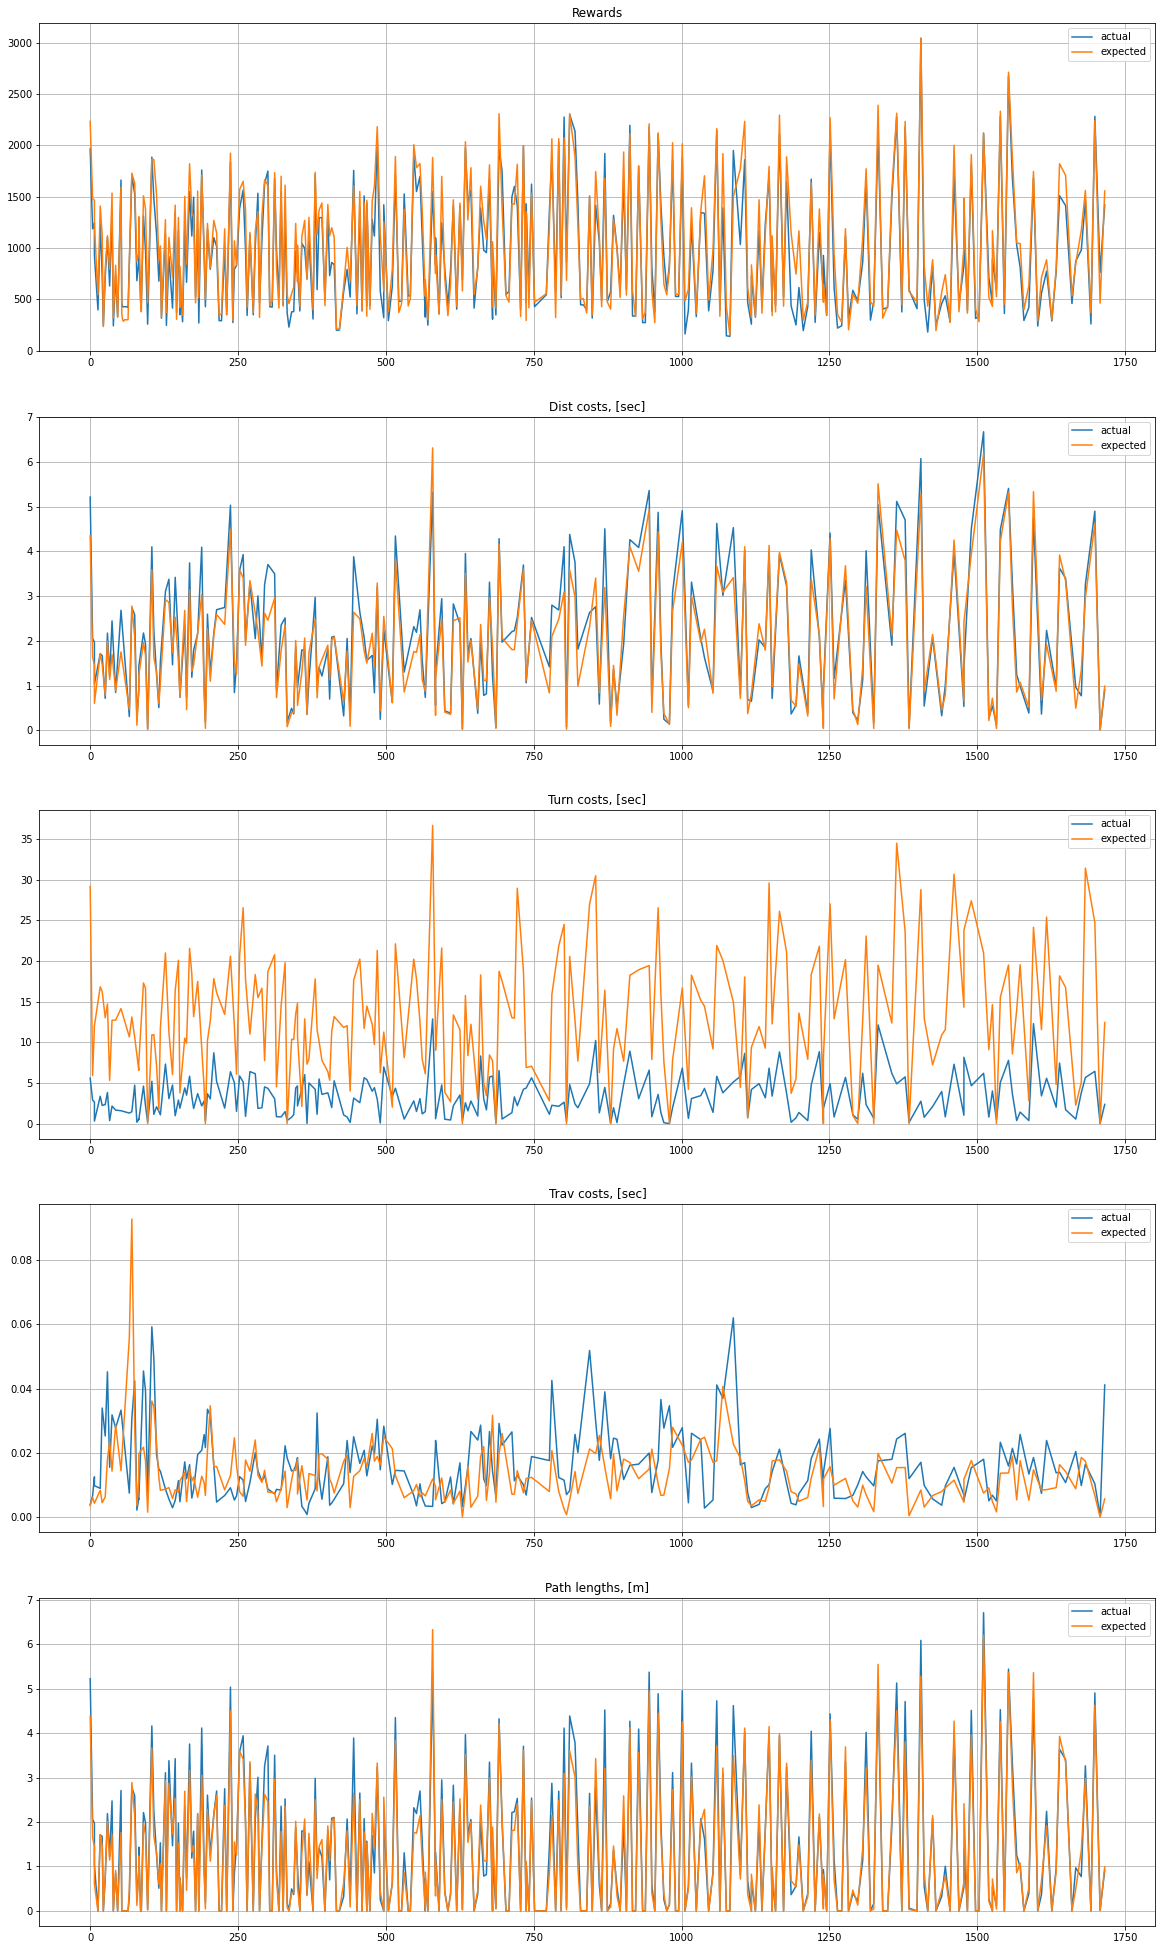

In [3]:
t = data["Time stamp"] - data["Time stamp"][0]

plt.figure(figsize=(20, 35))

plt.subplot(5, 1, 1)
plt.plot(t, data["Actual reward"], label='actual')
plt.plot(t, data["Expected reward"], label='expected')
plt.title("Rewards")
plt.grid()
plt.legend()

plt.subplot(5, 1, 2)
t1 = data_wo_nans["Time stamp"] - data_wo_nans["Time stamp"][0]
plt.plot(t1, data_wo_nans["Actual cost: dist"], label='actual')
plt.plot(t1, data_wo_nans["Expected cost: dist"], label='expected')
plt.title("Dist costs, [sec]")
plt.grid()
plt.legend()

plt.subplot(5, 1, 3)
t1 = data_wo_nans["Time stamp"] - data_wo_nans["Time stamp"][0]
plt.plot(t1, data_wo_nans["Actual cost: turn"], label='actual')
plt.plot(t1, data_wo_nans["Expected cost: turn"], label='expected')
plt.title("Turn costs, [sec]")
plt.grid()
plt.legend()

plt.subplot(5, 1, 4)
t1 = data_wo_nans["Time stamp"] - data_wo_nans["Time stamp"][0]
plt.plot(t1, data_wo_nans["Actual cost: trav"], label='actual')
plt.plot(t1, data_wo_nans["Expected cost: trav"], label='expected')
plt.title("Trav costs, [sec]")
plt.grid()
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(t, data["Actual path length"], label='actual')
plt.plot(t, data["Expected path length"], label='expected')
plt.title("Path lengths, [m]")
plt.grid()
plt.legend();